In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
df_soil = pd.read_excel('../data/compiled data for analysis 050223.xlsx', sheet_name='r2_4')
df_taxa = pd.read_excel('../data/compiled taxa data for analysis 050223.xlsx', sheet_name='taxa_index')

In [3]:
df_taxa.head()

,Day,Rep,Nutrient,Pathogen,taxa1,taxa2,taxa3,taxa4,taxa5,taxa6,...,taxa491,taxa492,taxa493,taxa494,taxa495,taxa496,taxa497,taxa498,taxa499,taxa500
0,0,2,HNS,LM,0,0.021511,0,0,0.083564,0,...,0,0.006619,0.039713,0.494763,0.002482,0,0,0,0,0
1,0,3,HNS,LM,0,0,0,0,0.039168,0,...,0,0,0.112607,0.553244,0,0,0.102815,0,0,0
2,0,4,HNS,LM,0,0,0,0,0.016833,0,...,0,0,0.048815,0.070697,0.011783,0,0,0,0,0
3,0,2,HNS,none,0,0.030896,0,0,0.066005,0,...,0,0,0.033705,0.362324,0,0,0.016852,0,0,0
4,0,3,HNS,none,0,0,0,0,0.121501,0,...,0,0.033029,0.058981,0.316138,0.004718,0,0,0,0,0


In [4]:
df = pd.concat([df_soil, df_taxa.drop(['Day', 'Rep', 'Nutrient', 'Pathogen'], axis=1)], axis=1)

In [12]:
df.head(2)

,Day,Rep,Nutrient,pathogen,path_count,total_count,pH,EC mmhos/cm,Alkalinity mg/kg CaCO3,Cl- (ppm),...,taxa491,taxa492,taxa493,taxa494,taxa495,taxa496,taxa497,taxa498,taxa499,taxa500
0,0,2,HNS,LM,4.081834,7.326346,8.3,1.57,369.0,155.65,...,0,0.006619,0.039713,0.494763,0.002482,0,0,0,0,0
1,0,3,HNS,LM,3.669626,7.160333,8.2,1.24,464.0,166.03,...,0,0,0.112607,0.553244,0,0,0.102815,0,0,0


In [5]:
first_day = df[df['Day'] == 1]

In [6]:
last_day = df[df['Day'] == 14]

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder_nutrient = LabelEncoder()
first_day['Nutrient'] = encoder_nutrient.fit_transform(first_day['Nutrient'])
last_day['Nutrient'] = encoder_nutrient.fit_transform(last_day['Nutrient'])

/Users/matejamilicevic/anaconda3/envs/kaggle_comps/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/matejamilicevic/anaconda3/envs/kaggle_comps/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_33801/3961106534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_day['Nutrient'] = encoder_nutrient.fit_t

In [8]:
encoder_pathogen = LabelEncoder()
first_day['pathogen'] = encoder_pathogen.fit_transform(first_day['pathogen'])
last_day['pathogen'] = encoder_pathogen.fit_transform(last_day['pathogen'])

/Users/matejamilicevic/anaconda3/envs/kaggle_comps/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/matejamilicevic/anaconda3/envs/kaggle_comps/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_33801/1167411783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_day['pathogen'] = encoder_pathogen.fit_t

In [9]:
first_day.replace('.', 0, inplace=True)

/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_33801/3880903373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_day.replace('.', 0, inplace=True)


In [10]:
first_day.fillna(0, inplace=True)

/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_33801/1990394244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_day.fillna(0, inplace=True)


In [11]:
last_day.replace('.', 0, inplace=True)
last_day.fillna(0, inplace=True)

/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_33801/4008613149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_day.replace('.', 0, inplace=True)
/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_33801/4008613149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_day.fillna(0, inplace=True)


In [12]:
first_day = first_day.apply(pd.to_numeric, errors='coerce').fillna(0)
last_day = last_day.apply(pd.to_numeric, errors='coerce').fillna(0)

In [98]:
first_day.columns[:23]

Index(['Day', 'Rep', 'Nutrient', 'pathogen', 'path_count', 'total_count', 'pH',
       'EC mmhos/cm', 'Alkalinity mg/kg CaCO3', 'Cl- (ppm)', 'K (ppm)',
       'Na (ppm)', 'Ca (ppm)', 'Mg (ppm)', 'Cu (ppm)', 'Fe (ppm)', 'Mn (ppm)',
       'Zn (ppm)', 'Dissolved P (ppm)', 'Total P (ppm)', 'Total N (%)',
       'Total N ppm', 'TOC'],
      dtype='object')

In [13]:
X = first_day[first_day.columns[23:]].values
y = last_day[last_day.columns[6:23]].values

In [14]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(0.95)
principalComponents = pca.fit_transform(X)

# Model training

In [15]:
principalComponents.shape

(24, 3)

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [17]:
class NNModel(nn.Module):
    def __init__(self, input_size = 100, out_features=5):
        super(NNModel, self).__init__()
        
        self.fc1 = nn.Linear(in_features=input_size, out_features=50)
        self.fc2 = nn.Linear(in_features=50, out_features=out_features)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

In [18]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [19]:
X = torch.tensor(principalComponents, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [154]:
last_day.loc[82]

Day           14.000000
Rep            3.000000
Nutrient       0.000000
pathogen       1.000000
path_count     3.585863
                ...    
taxa496        0.000000
taxa497        0.000000
taxa498        0.000000
taxa499        0.000000
taxa500        0.000000
Name: 82, Length: 523, dtype: float64

In [33]:
index_train, index_test , idx_train, idx_test = train_test_split(last_day.index.to_list(), last_day.index.to_list(), test_size=0.4, random_state=42)

In [163]:
last_day.head()

,Day,Rep,Nutrient,pathogen,path_count,total_count,pH,EC mmhos/cm,Alkalinity mg/kg CaCO3,Cl- (ppm),...,taxa491,taxa492,taxa493,taxa494,taxa495,taxa496,taxa497,taxa498,taxa499,taxa500
72,14,2,0,0,3.191908,7.060681,8.00,1.660,358.0,129.24,...,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,0
73,14,3,0,0,3.506208,7.515462,8.10,1.910,482.0,151.88,...,0,0.105298,0.000000,0.165730,0.504514,0,0,0,0.0,0
74,14,4,0,0,2.840621,7.018514,8.06,2.299,373.0,243.40,...,0,0.000000,0.000000,0.378942,1.061434,0,0,0,0.0,0
75,14,2,0,3,0.000000,7.080639,8.00,1.660,358.0,129.24,...,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,0
76,14,3,0,3,0.000000,7.600186,8.10,1.910,482.0,151.88,...,0,0.021785,0.003789,0.594815,0.408225,0,0,0,0.0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [20]:
class MeanSquaredLogarithmicError(nn.Module):
    def __init__(self):
        super(MeanSquaredLogarithmicError, self).__init__()

    def forward(self, y_pred, y_true):
        y_pred = torch.clamp(y_pred, min=0)
        y_true = torch.clamp(y_true, min=0)
        
        return torch.mean((torch.log1p(y_true) - torch.log1p(y_pred)) ** 2)


In [67]:
import torch.optim as optim
model = NNModel(3, 17)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [72]:
from sklearn.model_selection import KFold
def train_model():
    model.train()
    # Assuming you have your dataset X, y
    kf = KFold(n_splits=7) # Example of 5-fold cross-validation
    patience = 0
    best_loss = [100, 100, 100, 100, 100, 100, 100]
    while True:
        
        for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
            print(f'Fold {fold+1}')

            X_t, X_v = X_train[train_index], X_train[val_index]
            y_t, y_v = y_train[train_index], y_train[val_index]

            for epoch in range(5):  # 100 epochs
                optimizer.zero_grad()
                
                outputs = model(X_t)
                loss = criterion(outputs, y_t)
                loss.backward()
                optimizer.step()
                
                # Validation step
                with torch.no_grad():
                    val_outputs = model(X_v)
                    val_loss = criterion(val_outputs, y_v)

                print(f'[{epoch + 1}] Training loss: {loss.item():.5f}, Validation loss: {val_loss.item():.5f}')
                if val_loss.item() < best_loss[fold]:
                    best_loss[fold] = val_loss.item()
                    patience = 0
                elif val_loss.item() > best_loss[fold]: 
                    patience += 1
                    if patience == 50:
                        print(f'Finished training with best val loss of {best_loss}')
                        return

            print('Finished Training for Fold', fold+1)
train_model()
   

Fold 1
[1] Training loss: 33.98747, Validation loss: 5.91774
[2] Training loss: 34.00101, Validation loss: 6.05423
[3] Training loss: 33.53640, Validation loss: 7.22172
[4] Training loss: 32.94789, Validation loss: 8.71189
[5] Training loss: 32.37064, Validation loss: 9.91519
Finished Training for Fold 1
Fold 2
[1] Training loss: 23.08363, Validation loss: 71.55016
[2] Training loss: 20.39415, Validation loss: 86.64391
[3] Training loss: 17.86564, Validation loss: 104.07686
[4] Training loss: 16.22064, Validation loss: 122.46078
[5] Training loss: 15.79945, Validation loss: 139.39929
Finished Training for Fold 2
Fold 3
[1] Training loss: 36.64306, Validation loss: 15.87046
[2] Training loss: 37.32981, Validation loss: 14.84324
[3] Training loss: 36.55049, Validation loss: 13.65130
[4] Training loss: 35.43409, Validation loss: 13.37477
[5] Training loss: 34.34475, Validation loss: 13.96802
Finished Training for Fold 3
Fold 4
[1] Training loss: 34.56035, Validation loss: 9.47649
[2] Trai

# Results

In [73]:
model.eval()
all_predictions = []
all_labels = []
with torch.no_grad():  # Disable gradient computation
    
    outputs = model(torch.tensor(X_test, dtype=torch.float32))

/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_33801/890670180.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = model(torch.tensor(X_test, dtype=torch.float32))


In [31]:
mapping_nutrient = dict(zip(range(len(encoder_nutrient.classes_)), encoder_nutrient.classes_))
mapping_pathogen = dict(zip(range(len(encoder_pathogen.classes_)), encoder_pathogen.classes_))
print(mapping_pathogen)
print(mapping_nutrient)

{0: 'LM', 1: 'STEC', 2: 'Sal', 3: 'none'}
{0: 'HNS', 1: 'LNS'}


In [34]:
x_ticks = [f"Rep {int(last_day.loc[x]['Rep'])}" for x in index_test]

In [35]:
colors = {mapping_nutrient[0]: 'red', mapping_nutrient[1]: 'blue'}
markers = {mapping_pathogen[0]: 'o', mapping_pathogen[1]: 's', mapping_pathogen[2] : 'v', 'none' : '*'}

NameError: name 'x_ticks' is not defined

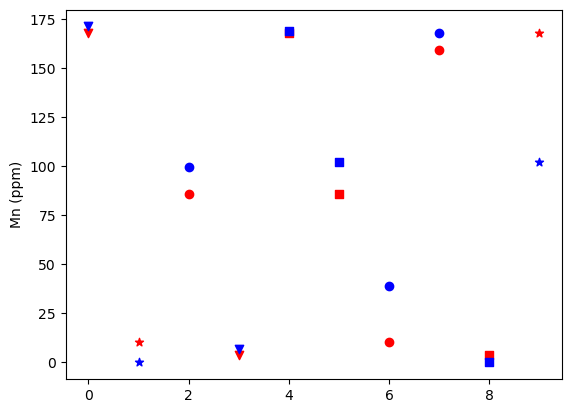

In [74]:
n = 16
for i in range(y_test.shape[0]):
    nutrient = mapping_nutrient[last_day.loc[index_test[i]]['Nutrient']]
    pathogen = mapping_pathogen[last_day.loc[index_test[i]]['pathogen']]
    plt.scatter(i, y_test[i, n], color='red', marker=markers[pathogen])
    plt.scatter(i, outputs[i, n], color='blue', marker=markers[pathogen])
plt.scatter([], [], color='red', label='Actual LM', marker='o')
plt.scatter([], [], color='red', label='Actual STEC', marker='s')
plt.scatter([], [], color='red', label='Actual Sal', marker='v')
plt.scatter([], [], color='red', label='Actual', marker='*')
plt.scatter([], [], color='blue', label='Predicted LM', marker='o')
plt.scatter([], [], color='blue', label='Predicted STEC', marker='s')
plt.scatter([], [], color='blue', label='Predicted Sal', marker='v')
plt.scatter([], [], color='blue', label='Predicted', marker='*')
plt.ylabel(df.columns[n])
plt.xticks(ticks = [x for x in range(y_test.shape[0])],labels=x_ticks, rotation=90)
plt.xlabel('Replicate')
plt.legend(title='Pathogen Inoculation')
plt.grid()
plt.title('Actual vs Predicted Values for TOC. \n Predictions made for Day 14 data using Day 1 data.')
plt.show()

In [41]:
last_day.columns[:22]

Index(['Day', 'Rep', 'Nutrient', 'pathogen', 'path_count', 'total_count', 'pH',
       'EC mmhos/cm', 'Alkalinity mg/kg CaCO3', 'Cl- (ppm)', 'K (ppm)',
       'Na (ppm)', 'Ca (ppm)', 'Mg (ppm)', 'Cu (ppm)', 'Fe (ppm)', 'Mn (ppm)',
       'Zn (ppm)', 'Dissolved P (ppm)', 'Total P (ppm)', 'Total N (%)',
       'Total N ppm'],
      dtype='object')

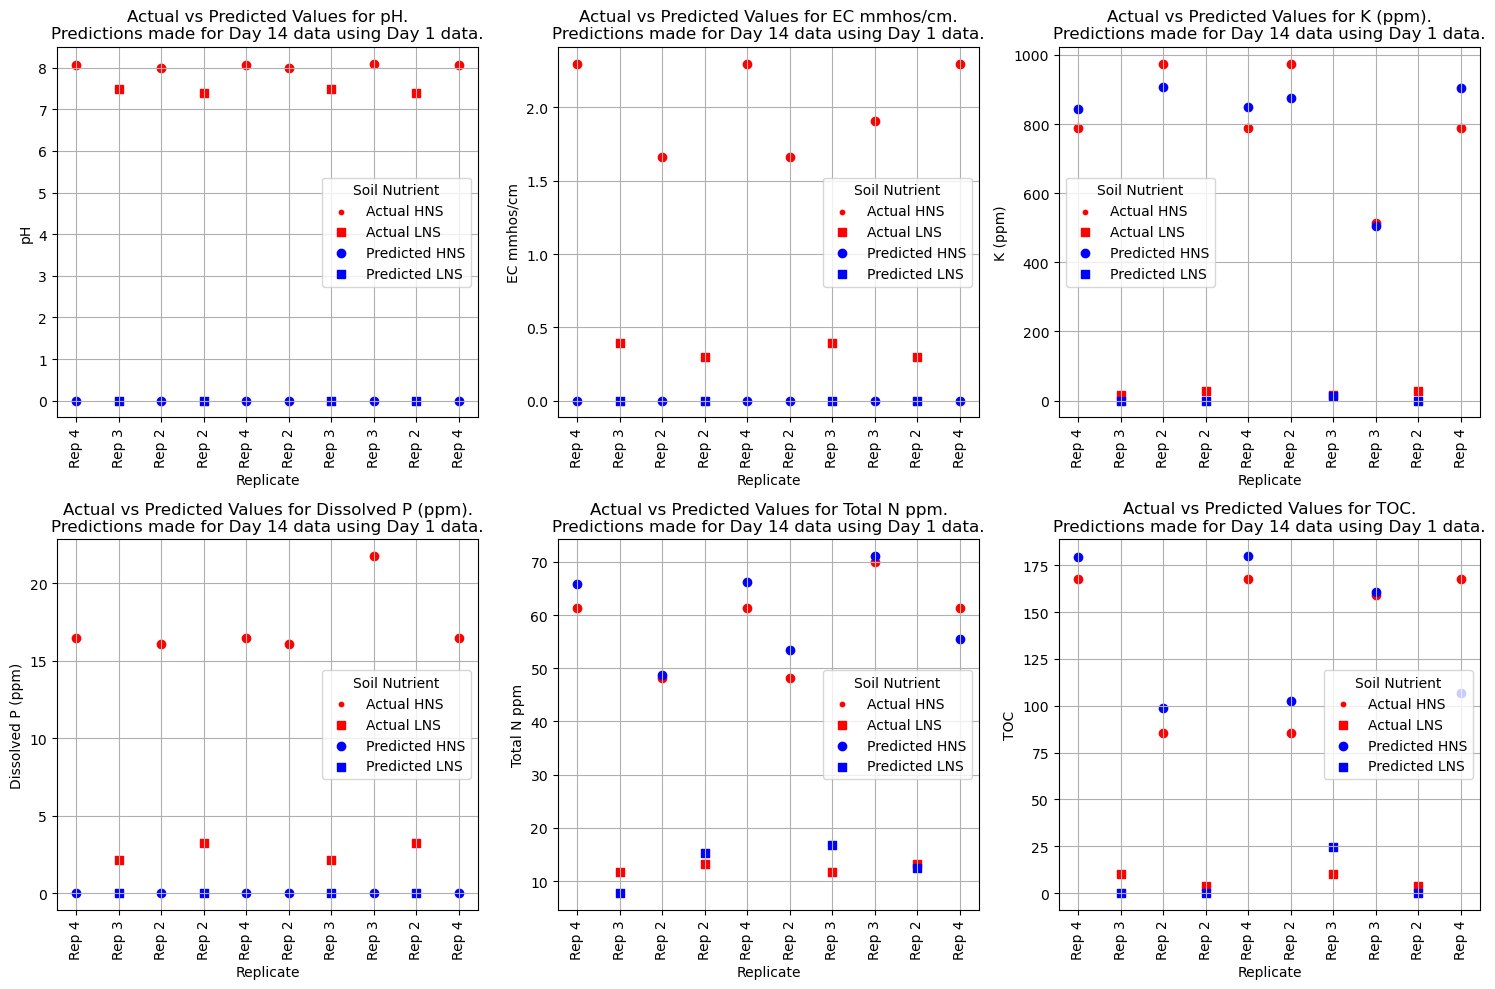

In [135]:
import matplotlib.pyplot as plt
import pandas as pd


indices = [0, 1, 4, 12, 15, 16]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easy indexing

for ax, n in zip(axs, indices):
    markers_nutrient = {mapping_nutrient[0]: 'o', mapping_nutrient[1]: 's'}
    for i in range(y_test.shape[0]):
        nutrient = mapping_nutrient[last_day.loc[index_test[i]]['Nutrient']]
        pathogen = mapping_pathogen[last_day.loc[index_test[i]]['pathogen']]
        ax.scatter(i, y_test[i, n], color='red', marker=markers_nutrient[nutrient])
        ax.scatter(i, outputs[i, n], color='blue', marker=markers_nutrient[nutrient])
    ax.scatter([], [], color='red', label='Actual HNS', marker='o', s=10)
    ax.scatter([], [], color='red', label='Actual LNS', marker='s')
    ax.scatter([], [], color='blue', label='Predicted HNS', marker='o')
    ax.scatter([], [], color='blue', label='Predicted LNS', marker='s')
    ax.set_ylabel(df.columns[n+6])
    ax.set_xticks([x for x in range(y_test.shape[0])])
    ax.set_xticklabels(x_ticks, rotation=90)
    ax.set_xlabel('Replicate')
    ax.legend(title='Soil Nutrient')
    ax.grid()
    ax.set_title(f'Actual vs Predicted Values for {df.columns[n+6]}.\nPredictions made for Day 14 data using Day 1 data.')

plt.tight_layout()
plt.show()


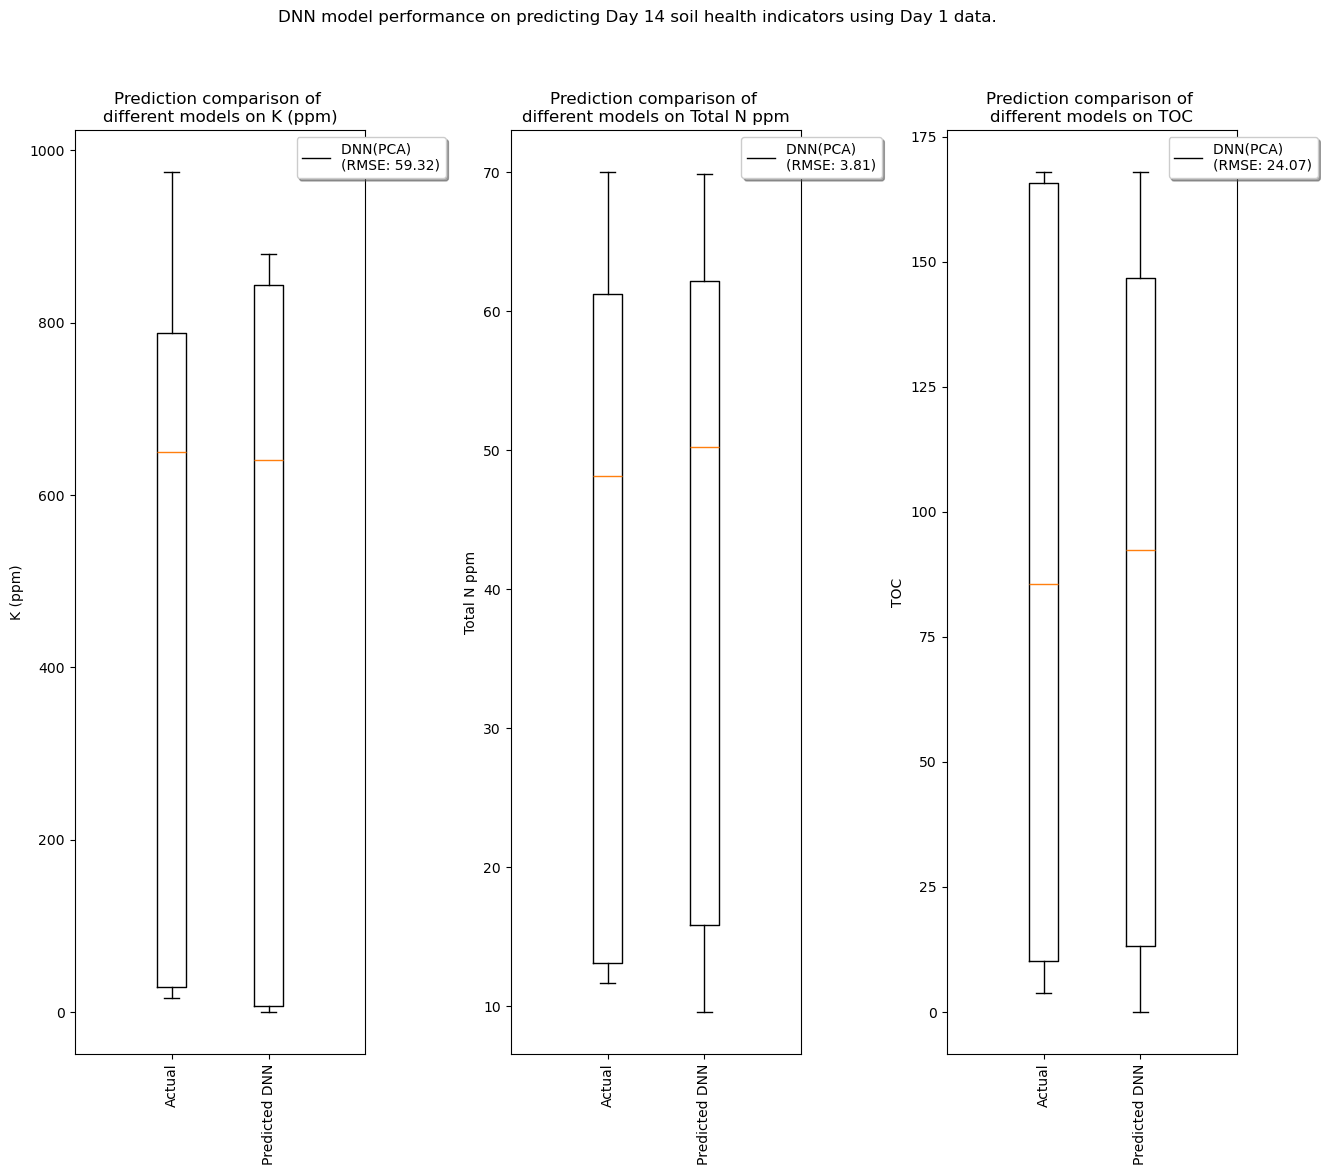

In [39]:
import matplotlib.pyplot as plt
indices = [4, 15, 16]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 12))
axs = axs.flatten()  # Flatten the 2D array of axes for easy indexing

for ax, i in zip(axs, indices):
    # Plot on the respective subplot


        
    
    
    ax.boxplot([y_test[:,i] , outputs[:,i]], 
               positions=[1, 1.5])

    # Set title, x-ticks, and y-label for each subplot
    
    ax.set_title(f'Prediction comparison of \ndifferent models on {df.columns[i+6]}')
    ax.set_xticks([1, 1.5])
    ax.set_xticklabels(['Actual', 'Predicted DNN'], 
                       rotation=90)
    ax.set_ylabel(df.columns[i+6])
    ax.legend([
               f'DNN(PCA) \n(RMSE: {np.sqrt(mean_squared_error(y_test[:,i], outputs[:,i])):.2f})'],
                bbox_to_anchor=(1.3, 1),
              fancybox=True, shadow=True)

# Adjust layout for better spacing
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('DNN model performance on predicting Day 14 soil health indicators using Day 1 data.')
plt.show()

/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_18204/4245138875.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Value', data=df_violin, palette=['blue', 'green'])


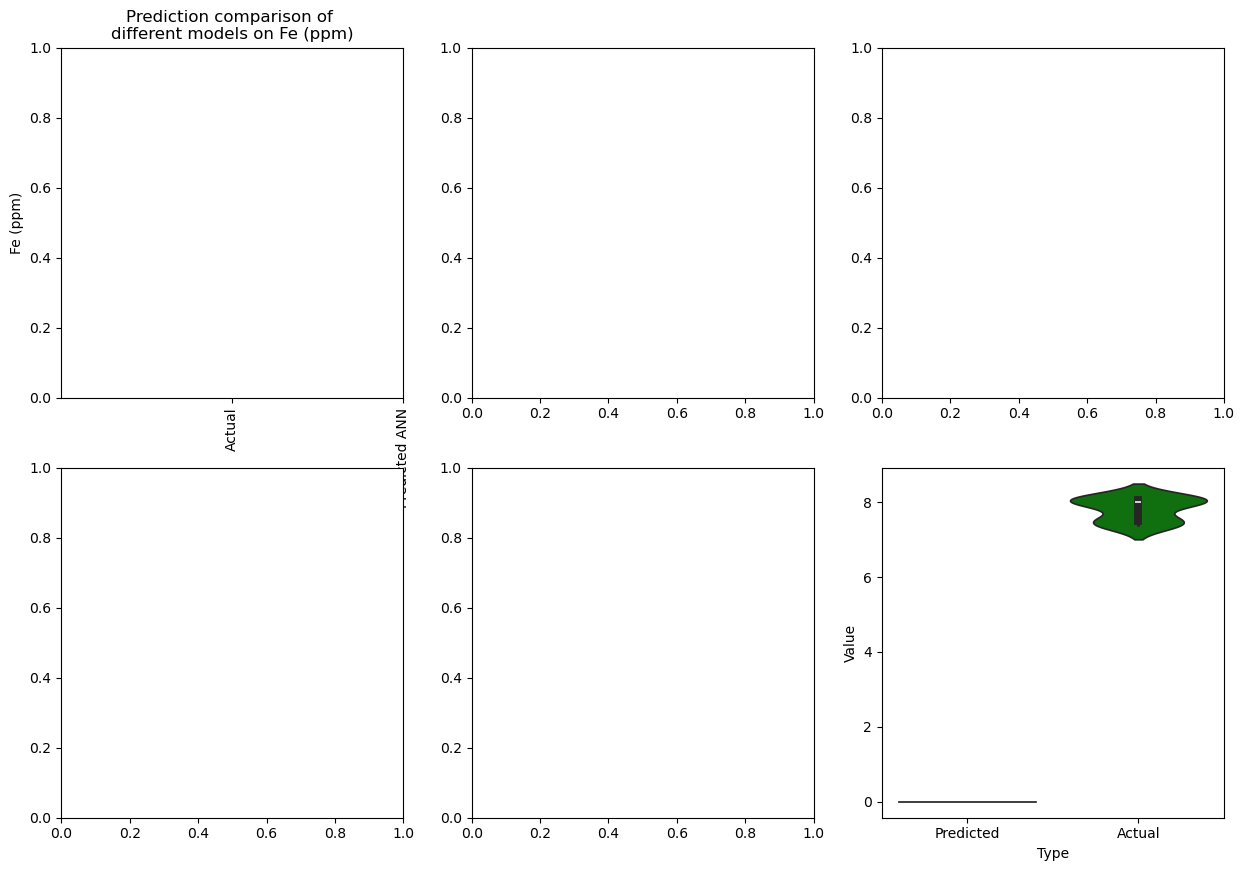

/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_18204/4245138875.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Value', data=df_violin, palette=['blue', 'green'])


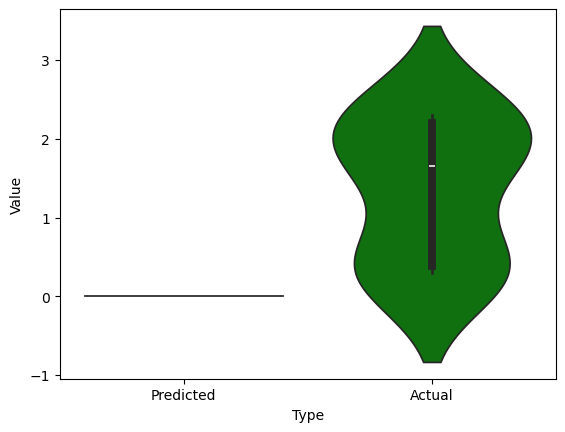

/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_18204/4245138875.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Value', data=df_violin, palette=['blue', 'green'])


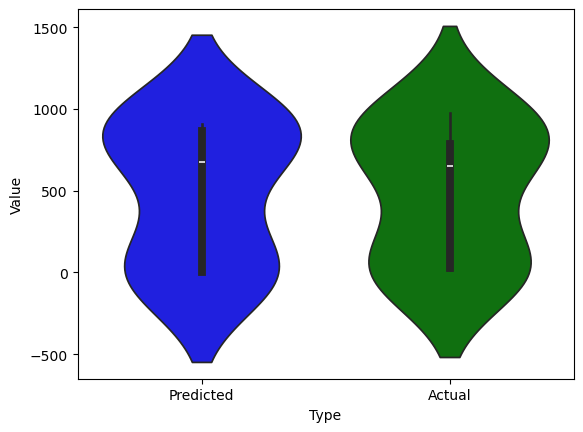

/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_18204/4245138875.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Value', data=df_violin, palette=['blue', 'green'])


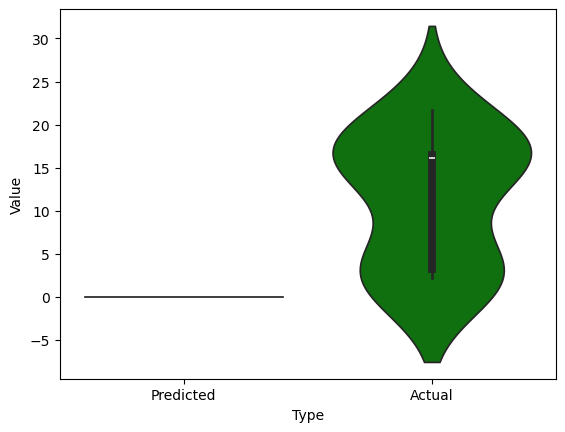

/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_18204/4245138875.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Value', data=df_violin, palette=['blue', 'green'])


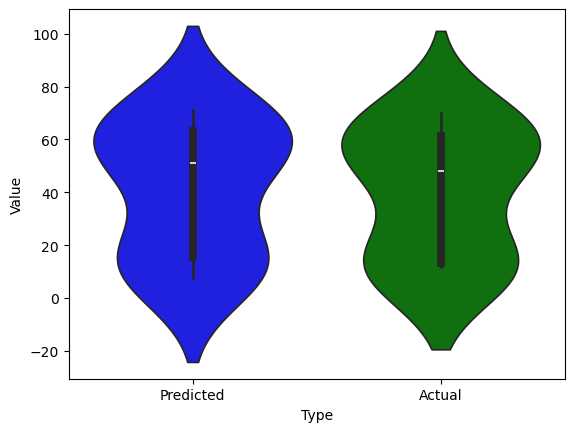

/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_18204/4245138875.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Value', data=df_violin, palette=['blue', 'green'])


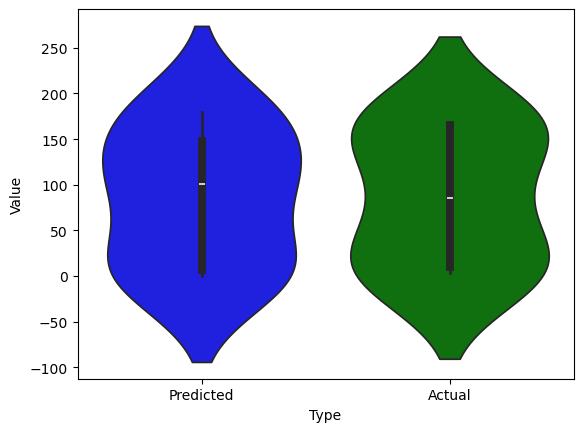

<Figure size 640x480 with 0 Axes>

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
indices = [0, 1, 4, 12, 15, 16]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easy indexing

for ax, n in zip(axs, indices):
    df_predicted = pd.DataFrame({'Value': outputs[:,n].numpy(), 'Type': 'Predicted'})
    df_actual = pd.DataFrame({'Value': y_test[:,n].numpy(), 'Type': 'Actual'})
    df_violin = pd.concat([df_predicted, df_actual])
    sns.violinplot(x='Type', y='Value', data=df_violin, palette=['blue', 'green'])
    ax.set_title(f'Comparison of Predicted and Actual Values for {df.columns[n]}')
    

        

    # Set title, x-ticks, and y-label for each subplot
    
    ax.set_title(f'Prediction comparison of \ndifferent models on {df.columns[i+6]}')
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Actual', 'Predicted ANN'], 
                       rotation=90)
    ax.set_ylabel(df.columns[i+6])
    plt.show()

# Adjust layout for better spacing
plt.subplots_adjust(wspace=1.5, hspace=1.5)
plt.suptitle('Performance comparison of models trained on the entire soil extract dataset.')
plt.show()

Text(0.5, 1.0, 'Comparison of TOC predicted vs actual')

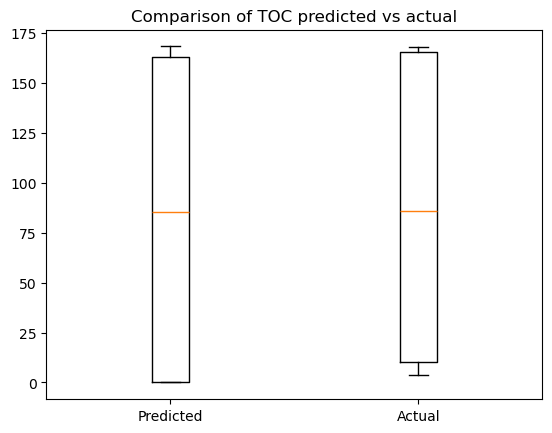

In [108]:
plt.boxplot([outputs[:,n], y_test[:,n]], labels=['Predicted', 'Actual'])
plt.title(f'Comparison of {df.columns[n]} predicted vs actual')

In [109]:
import seaborn as sns

In [110]:
df_predicted = pd.DataFrame({'Value': outputs[:,n].numpy(), 'Type': 'Predicted'})
df_actual = pd.DataFrame({'Value': y_test[:,n].numpy(), 'Type': 'Actual'})
df_violin = pd.concat([df_predicted, df_actual])

/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_24719/3422499339.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Value', data=df_violin, palette=['blue', 'green'])


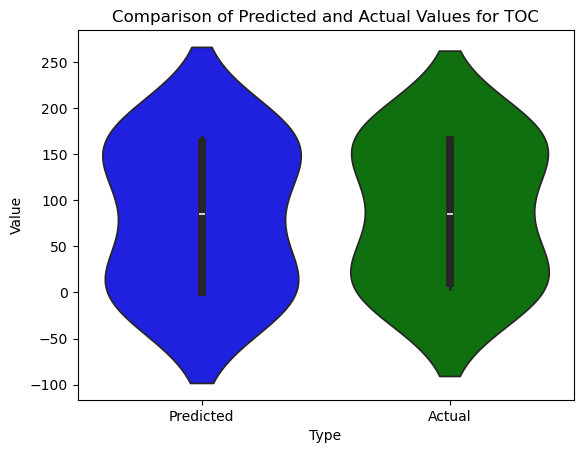

In [116]:
sns.violinplot(x='Type', y='Value', data=df_violin, palette=['blue', 'green'])
plt.title(f'Comparison of Predicted and Actual Values for {df.columns[n]}')
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
np.sqrt(mean_squared_error(y_test[:,n], outputs[:,n]))

111.60423

# Machine Learning 

In [40]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [41]:
import re
def format_filename(filename):
    """
    Formats the given filename to remove special characters that
    might interfere with directory structures.
    """
    # Replace forbidden characters with an underscore
    filename = re.sub(r'[\\/*?:"<>|]', '_', filename)
    
    # Replace spaces with underscores
    filename = filename.replace(' ', '_')

    return filename

In [42]:
def fit_svr(i, X, y_train, X_test, y_test):    
    svr = SVR()

# Define the parameter grid
    param_grid = {
        'C': [0.1, 1, 10, 100],         # Regularization parameter
        'gamma': ['scale', 'auto'],     # Kernel coefficient
        'kernel': ['rbf', 'linear', 'poly'],    # Specifies the kernel type to be used
    }

    # Setup GridSearchCV
    grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, 
                            cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

    # Perform grid search
    grid_search.fit(X, y_train[:,i])

    # Print the best parameters and the best score
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {-grid_search.best_score_}")

    # Evaluate on the test set
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X_test, y_test[:,i])
    y_pred = best_model.predict(X_test)
    #y_pred = [np.average([y_pred[j], all_predictions[j,0]]) for j, x in enumerate(y_pred)]
    print(f"Test set score: {test_score}")
    plt.boxplot([y_test[:,i], y_pred], labels=['Actual', 'Pred'])
    plt.title(f'SVR-{df.columns[i]} RMSE : {np.sqrt(mean_squared_error(y_test[:,i], y_pred))}')
    
    plt.savefig(f'../plots/first-last/svr_{format_filename(df.columns[i])}')
    plt.show()
    return best_model, y_pred

In [43]:
from sklearn.ensemble import RandomForestRegressor
def fit_rf(i, X, y_train, X_test, y_test):
    rf = RandomForestRegressor(random_state=42)


    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                                cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')


    grid_search_rf.fit(X, y_train[:,i])


    print(f"Best parameters (RF): {grid_search_rf.best_params_}")
    print(f"Best score (RF): {-grid_search_rf.best_score_}")


    best_rf = grid_search_rf.best_estimator_
    test_score_rf = best_rf.score(X_test, y_test[:,i])
    print(f"Test set score (RF): {test_score_rf}")
    y_pred_rf = best_rf.predict(X_test)
    plt.boxplot([y_test[:,i], y_pred_rf], labels=['Actual', 'Pred'])
    plt.title(f'RF-{df.columns[i]} RMSE : {np.sqrt(mean_squared_error(y_test[:,i], y_pred_rf))}')
    
    plt.savefig(f'../plots/first-last/rf_{format_filename(df.columns[i])}.png')
    plt.show()
    return best_rf, y_pred_rf

In [44]:
from lightgbm import LGBMRegressor
def fit_lgbm(i, X, y_train, X_test, y_test):
    lgbm = LGBMRegressor(random_state=42)

    # Define the parameter grid
    param_grid_lgbm = {
        'num_leaves': [2,3,5,10,20,31, 50, 70],
        'learning_rate': [0.01, 0.05, 0.1, 0.001],
        'n_estimators': [3,5,7,10,20, 50, 100, 200, 300]
    }

    # Setup GridSearchCV
    grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, 
                                    cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

    # Perform grid search
    grid_search_lgbm.fit(X, y_train[:,i])

    # Best parameters and score
    print(f"Best parameters (LGBM): {grid_search_lgbm.best_params_}")
    print(f"Best score (LGBM): {-grid_search_lgbm.best_score_}")

    # Test set evaluation
    best_lgbm = grid_search_lgbm.best_estimator_
    test_score_lgbm = best_lgbm.score(X_test, y_test[:,i])
    print(f"Test set score (LGBM): {test_score_lgbm}")
    y_pred_lgbm = best_lgbm.predict(X_test)
    plt.boxplot([y_test[:,i], y_pred_lgbm], labels=['Actual', 'Pred'])
    plt.title(f'LGBM-{df.columns[i]} RMSE : {np.sqrt(mean_squared_error(y_test[:,i], y_pred_lgbm))}')

    plt.savefig(f'../plots/first-last/lgbm_{format_filename(df.columns[i])}.png')
    plt.show()
    return best_lgbm, y_pred_lgbm
    

tensor([[-1.5207e+01,  5.8053e+00,  1.5456e+01],
        [ 3.4736e+01, -1.3368e+01,  2.9936e+00],
        [ 1.2614e+01,  2.5590e+01, -6.2977e+00],
        [-2.0810e+01, -3.4180e-02,  9.0648e+00],
        [-2.5599e+01, -1.1862e+01, -1.0800e+01],
        [ 1.2614e+01,  2.5590e+01, -6.2977e+00],
        [ 1.2614e+01,  2.5590e+01, -6.2977e+00],
        [ 1.2614e+01,  2.5590e+01, -6.2977e+00],
        [ 4.0622e+01, -1.4599e+01,  6.6572e+00],
        [-2.4375e+01, -1.1166e+01, -1.2582e+01],
        [-2.6324e+01, -1.1657e+01, -1.3758e+01],
        [ 4.0733e+01, -1.9323e+01,  5.3863e+00],
        [ 4.0135e+00, -7.5141e+00, -1.0193e+01],
        [-2.0088e+01, -2.8421e-01,  7.9941e+00]])

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=2; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=5; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=5; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=5; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=5; total time=   0.0s
[CV] END ..learning_rate=0.01, n_estimators=3, num_leaves=10; total time=   0.0s
[CV] END ..learning_rate=0.01, n_estimators=3, num_leaves=10; total time=   0.0s
[CV] END ..learning_rate=0.01, n_estimators=3, num_leaves=10; total time=   0.0s
[CV] END ..learning_rate=0.01, n_estimators=3, num_leaves=10; total time=   0.0s
[CV] END ..learning_rate=0.01, n_estimators=3, num_leaves=10; total time=   0.0s
[CV] END ..learning_rate=0.01, n_estimators=3, num_leaves=20; total time=   0.0s
[CV] END ..learning_rate=0.01, n_estimators=3, num_leaves=20; total time=   0.0s
[CV] END ..learning_rate=0.0

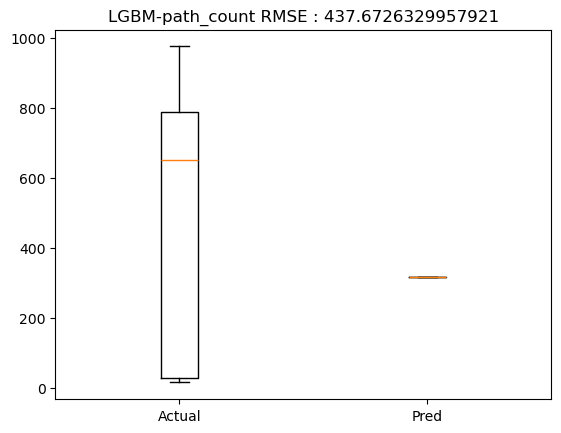

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, 

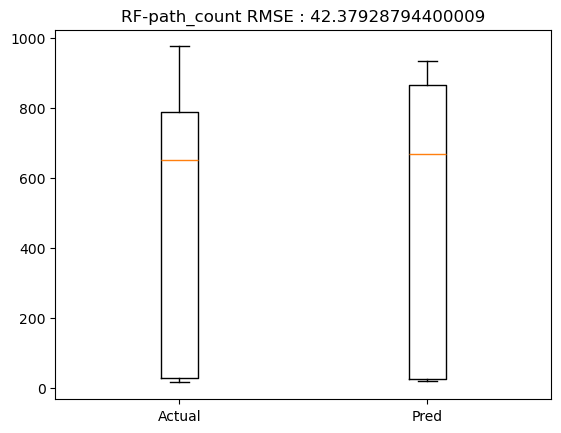

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

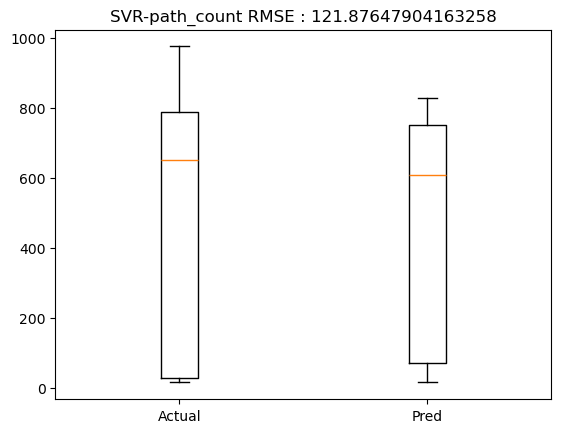

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=2; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=2; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=2; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=2; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=2; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=3; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=3; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=3; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=3; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=5; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=3; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=

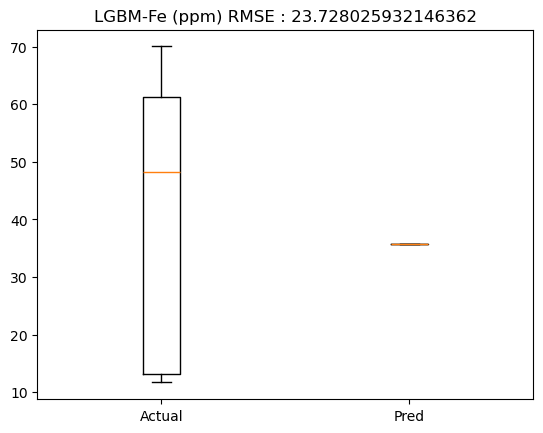

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, 

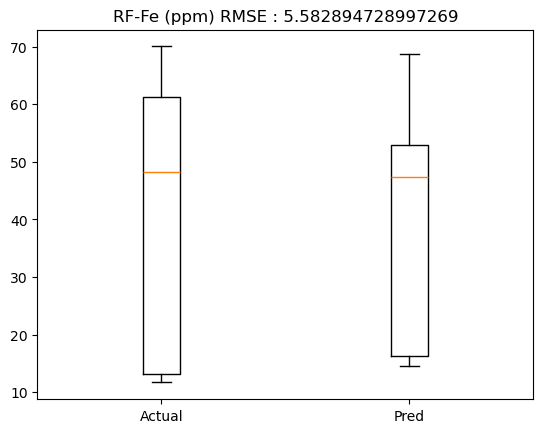

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

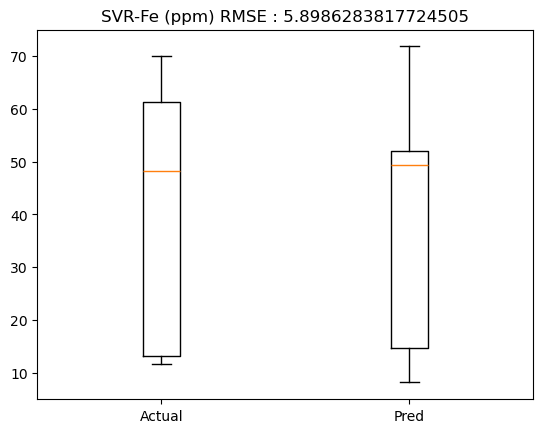

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=2; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=2; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=2; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=2; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=2; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=3; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=3; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=3; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=3; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=5; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=3, num_leaves=3; total time=   0.0s
[CV] END ...learning_rate=0.01, n_estimators=

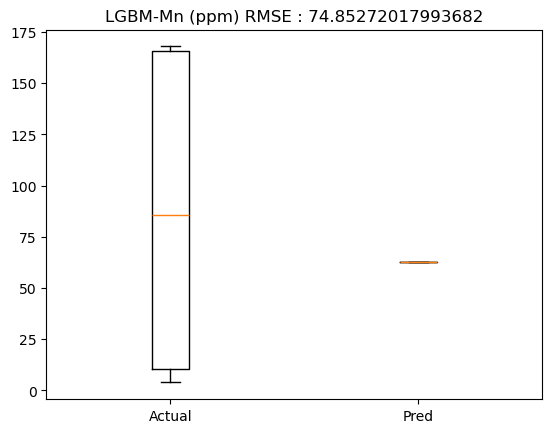

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, 

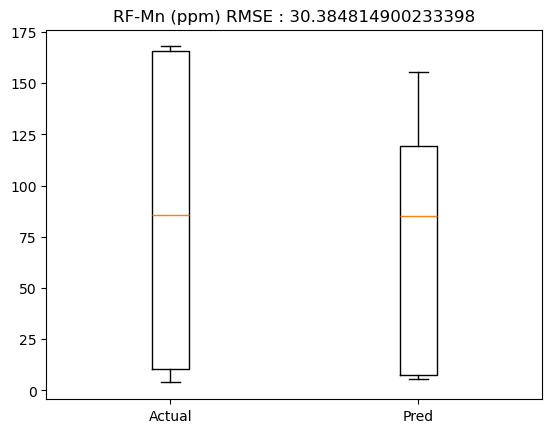

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

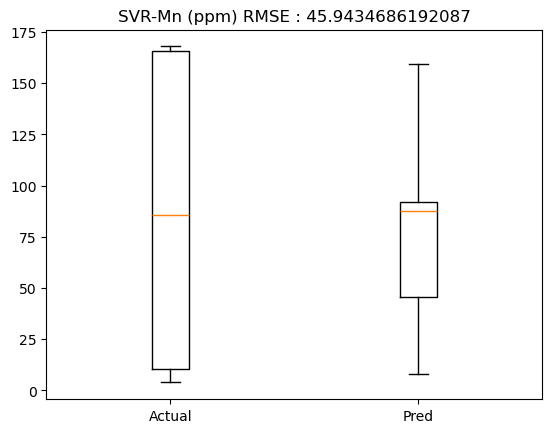

In [45]:
ist = [4,15,16]
lgbms = []
rfs = []
svrs = []
for i in ist:
    best_lgbm, lgbm_pred =fit_lgbm(i, X_train, y_train, X_test, y_test)
    best_rf, rf_pred = fit_rf(i, X_train, y_train, X_test, y_test)
    best_svr, svr_pred = fit_svr(i, X_train, y_train, X_test, y_test)
    lgbms.append(lgbm_pred)
    rfs.append(rf_pred)
    svrs.append(svr_pred)

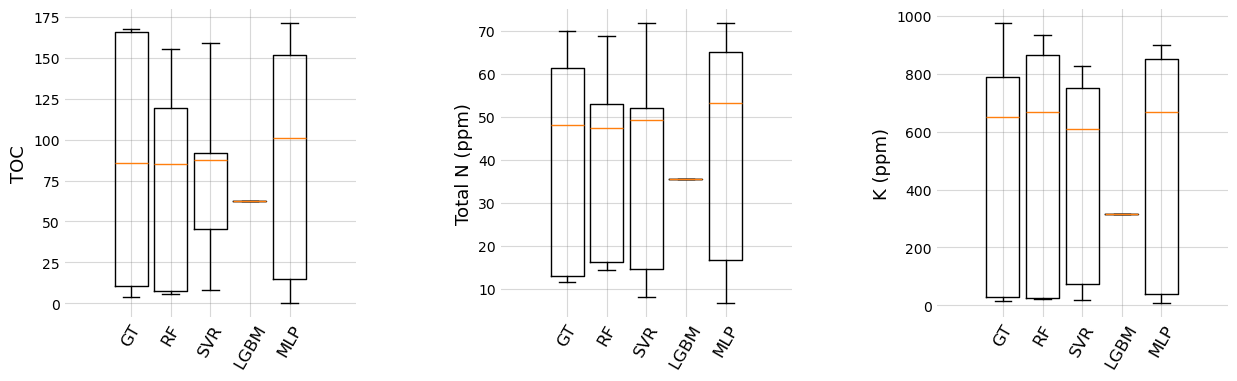

In [123]:
import matplotlib.pyplot as plt
indices = [16,15,4]

# Create a 2x3 grid of subplots
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
fig.set_facecolor('white')
axs = axs.flatten()  # Flatten the 2D array of axes for easy indexing
j=1
units = ['TOC', 'Total N (ppm)', 'K (ppm)', 'Dissolved P (ppm)', 'pH', 'EC (mmhos/cm)']
for ax, i in zip(axs, indices):
    # Plot on the respective subplot


        
    
    
    ax.boxplot([y_test[:,i] , rfs[-j], svrs[-j], lgbms[-j],outputs[:,i]], 
               positions=[1, 1.3,1.6, 1.9, 2.2], widths = 0.25)

    # Set title, x-ticks, and y-label for each subplot
    
  
    ax.set_xticks([1, 1.3,1.6, 1.9, 2.2])
    ax.set_xticklabels(['GT', 'RF', 'SVR', 'LGBM','MLP'], 
                       rotation=60, fontsize=12)
    ax.set_ylabel(units[j-1], fontsize = 13)
    ax.grid(color='tab:gray', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)
    ax.spines['left'].set_visible(False)
    ax.set_facecolor('white')
    j+=1
# Adjust layout for better spacing
plt.subplots_adjust(wspace=0.5, hspace=-1.5)
plt.show()